# Day 26

### Supervised learning

In [197]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [198]:
#create a simple area-price dataset

data = {
    'Area':[500,750,1000,1250,1500,1750,2000],
    'Price':[30,40,50,60,70,80,90]
}
df = pd.DataFrame(data)
print(df)

   Area  Price
0   500     30
1   750     40
2  1000     50
3  1250     60
4  1500     70
5  1750     80
6  2000     90


In [199]:
x = df[['Area']] # features(independent variables)
y =df['Price'] # target(dependent variable)
model = LinearRegression() #model is linear regression
model.fit(x,y) #fit the model
print(f"Intercept: {model.intercept_}")
print(f"coefficient: {model.coef_[0]}")
#predict price for a new area
model.predict([[1500]])

Intercept: 10.0
coefficient: 0.04


array([70.])

In [200]:
#checking y = mx+c
#here m = 0.04,x=1500,c=10
a = model.intercept_+(model.coef_[0]*1500)
a

np.float64(70.0)

In [201]:
data2={
    'Area':[500,750,1000,1250,1500,1750,2000],
    'Rooms':[1,2,3,4,5,6,7],
    'Price':[30,40,50,60,70,80,90]

}

df = pd.DataFrame(data2)
print(df)   


   Area  Rooms  Price
0   500      1     30
1   750      2     40
2  1000      3     50
3  1250      4     60
4  1500      5     70
5  1750      6     80
6  2000      7     90


In [202]:
x=df[['Area','Rooms']]
y = df['Price']
model = LinearRegression()
model.fit(x,y)
print(f'Intercept: {model.intercept_}')
print(f'coefficient for area: {model.coef_[0]}')
print(f'coefficient for room: {model.coef_[1]}')

model.predict([[1200,5]])

Intercept: 10.000159997440022
coefficient for area: 0.03999936001023985
coefficient for room: 0.00015999744004095942


array([58.000192])

In [203]:
#checking y = bo+b1x1+b2x2
a = (model.intercept_+(model.coef_[0]*1200)+(model.coef_[1]*5))
print(a)

58.000191996928045


### Training & Testing dataset

In [204]:
data3={
    'Mileage':[69000,35000,57000,22500,46000],
    'Age':[6,3,5,2,4],
    'Sell Price':[18000,34000,26100,40000,31500]
}
df3 = pd.DataFrame(data3)
print(df3)

   Mileage  Age  Sell Price
0    69000    6       18000
1    35000    3       34000
2    57000    5       26100
3    22500    2       40000
4    46000    4       31500


In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

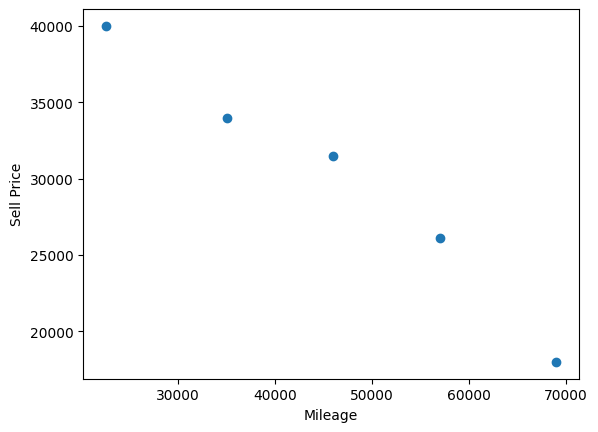

In [206]:
#Mileage vs Sell price
plt.scatter(df3['Mileage'],df3['Sell Price'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.show()

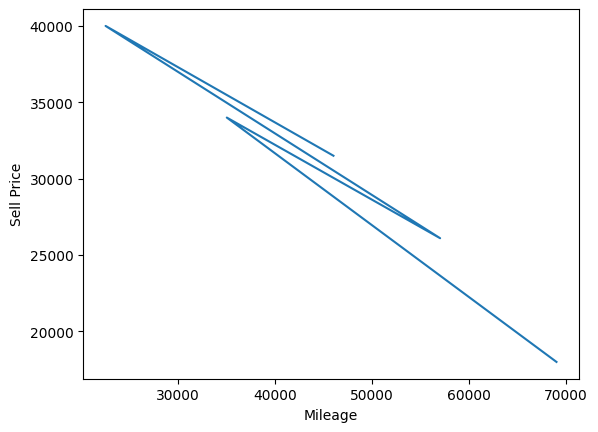

In [207]:
plt.plot(df3['Mileage'],df3['Sell Price'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.show()

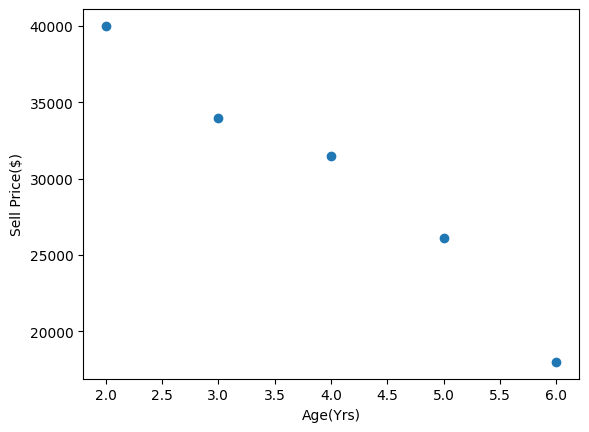

In [208]:
#Car Age vs Sell price
plt.scatter(df3['Age'],df3['Sell Price'])
plt.xlabel('Age(Yrs)')
plt.ylabel('Sell Price($)')
plt.show()

### Model Training and Testing of car prices data 

In [209]:
from sklearn.model_selection import train_test_split

### read carprices.csv

In [210]:
df3 = pd.read_csv("Dataset/carprices.csv")
df3

,mileage,age(years),sell price($)
0,126958,12,9902
1,151867,16,5605
2,136932,16,8172
3,108694,7,20059
4,124879,4,21687
...,...,...,...
495,83832,6,20567
496,56293,6,20531
497,83781,3,21709
498,196475,7,13273


In [211]:

x= df3[['mileage','age(years)']]
y = df3['sell price($)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [212]:
x_train

,mileage,age(years)
13,196335,1
61,22159,17
298,121336,8
39,171845,14
360,87989,10
...,...,...
255,76295,15
72,42065,3
396,181089,2
235,115078,1


In [213]:
x_test

,mileage,age(years)
304,131063,18
340,155810,3
47,74092,2
67,83953,7
479,139415,14
...,...,...
331,181597,15
197,73840,18
95,7568,16
122,82373,5


In [214]:
y_train

13     20841
61     11593
298    14634
39      5128
360    16611
       ...  
255     8838
72     24898
396    18418
235    21144
37     11135
Name: sell price($), Length: 350, dtype: int64

In [215]:
y_test

304     6283
340    16749
47     25343
67     15112
479     8484
       ...  
331     6175
197     8192
95     13482
122    22394
23     22144
Name: sell price($), Length: 150, dtype: int64

In [216]:
#Let's run linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [217]:
x_test

,mileage,age(years)
304,131063,18
340,155810,3
47,74092,2
67,83953,7
479,139415,14
...,...,...
331,181597,15
197,73840,18
95,7568,16
122,82373,5


In [218]:
x_train

,mileage,age(years)
13,196335,1
61,22159,17
298,121336,8
39,171845,14
360,87989,10
...,...,...
255,76295,15
72,42065,3
396,181089,2
235,115078,1


In [219]:
model.predict(x_test)

array([ 5187.78318969, 19287.21278179, 24303.25438668, 18717.99711805,
        8861.93189755,  6826.11918998, 17774.69900141, 21392.36599378,
       11400.22583606, 10888.60581244, 11534.85935626,  3864.00182056,
        6993.29405424, 11420.66714718,  3797.23556302, 14713.80124223,
        8475.02248047, 15235.06789111, 14009.10381382, 15125.18470232,
        4166.7668432 , 24479.20226674, 24912.54502394,  9869.41971359,
        9595.12087012,  4267.09473244, 13460.73998231, 13019.67217321,
        6216.17173069, 18995.65480338, 17322.19675241,  8455.19739564,
       16183.32124182,  8106.8154526 , 11668.46198056, 23164.77647771,
        7300.47649089, 19778.88871862,  9695.19368745, 24890.2222612 ,
       21414.98626142,  2172.56831163, 18930.70818523, 12050.02087319,
       18256.55395855,  7118.44884388, 12796.93809565,  3236.95251278,
       17048.89052036, 24729.26738236, 10199.05452319, 20405.12391793,
       23310.67239463, 27132.666269  , 20000.28562438, 21257.58994387,
      

In [220]:
y_test

304     6283
340    16749
47     25343
67     15112
479     8484
       ...  
331     6175
197     8192
95     13482
122    22394
23     22144
Name: sell price($), Length: 150, dtype: int64

In [221]:
model.score(x_test,y_test)

0.9008614453305523